Original DataFrame:
    Age Salary       City
0  25.0  50000  Bangalore
1   NaN  60000    Chennai
2  30.0  70000    Chennai
3  22.0  80000     Mumbai
4  40.0  90000  Bangalore
5  22.0  80000     Mumbai
6  30.0  70000    Chennai
7   NaN  60000    Chennai

--- Missing Values ---
Age       2
Salary    0
City      0
dtype: int64
MSE with missing values dropped: 460415754.4671713
MSE after replacing missing values: 220214076.34837952

--- Duplicates ---
Before removing duplicates: (8, 3)
After removing duplicates: (5, 3)
Explanation: Duplicate entries can lead to biased model training and overfitting.

--- Data Types ---
Before: Age       float64
Salary     object
City       object
dtype: object
After: Age       float64
Salary      int64
City       object
dtype: object
Explanation: Correct data types ensure proper mathematical operations and model processing.

--- Outliers ---


<ipython-input-1-452c7ee7d6de>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


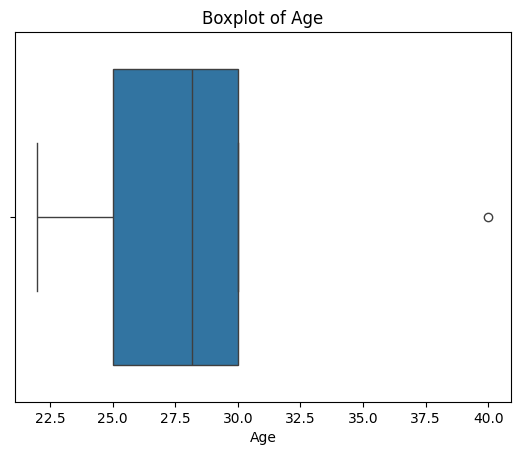

After removing outliers:
         Age  Salary       City
0  25.000000   50000  Bangalore
1  28.166667   60000    Chennai
2  30.000000   70000    Chennai
3  22.000000   80000     Mumbai
Technique: IQR method is effective for identifying and filtering out extreme values.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sample dataset
data = {
    'Age': [25, np.nan, 30, 22, 40, 22, 30, np.nan],
    'Salary': ['50000', '60000', '70000', '80000', '90000', '80000', '70000', '60000'],
    'City': ['Bangalore', 'Chennai', 'Chennai', 'Mumbai', 'Bangalore', 'Mumbai', 'Chennai', 'Chennai']
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)

# ----------------------------
# 1. MISSING VALUES
# ----------------------------

print("\n--- Missing Values ---")
print(df.isnull().sum())

# Replace missing Age with column mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Before model performance (with missing values)
df_missing = pd.DataFrame(data)
df_missing.dropna(inplace=True)
X1 = df_missing[['Age']]
y1 = df_missing['Salary'].astype(int)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X_train1, y_train1)
preds1 = model1.predict(X_test1)
print("MSE with missing values dropped:", mean_squared_error(y_test1, preds1))

# After replacing missing values
X2 = df[['Age']]
y2 = df['Salary'].astype(int)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
preds2 = model2.predict(X_test2)
print("MSE after replacing missing values:", mean_squared_error(y_test2, preds2))

# ----------------------------
# 2. DUPLICATES
# ----------------------------
print("\n--- Duplicates ---")
print("Before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

# Explanation
print("Explanation: Duplicate entries can lead to biased model training and overfitting.")

# ----------------------------
# 3. INCORRECT DATA TYPES
# ----------------------------
print("\n--- Data Types ---")
print("Before:", df.dtypes)

df['Salary'] = df['Salary'].astype(int)

print("After:", df.dtypes)
print("Explanation: Correct data types ensure proper mathematical operations and model processing.")

# ----------------------------
# 4. OUTLIERS
# ----------------------------
print("\n--- Outliers ---")
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

# Remove outliers using IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[(df['Age'] >= Q1 - 1.5*IQR) & (df['Age'] <= Q3 + 1.5*IQR)]

print("After removing outliers:")
print(df_cleaned)

print("Technique: IQR method is effective for identifying and filtering out extreme values.")